# 實驗一、Gramian Angular Field

# 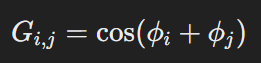

# 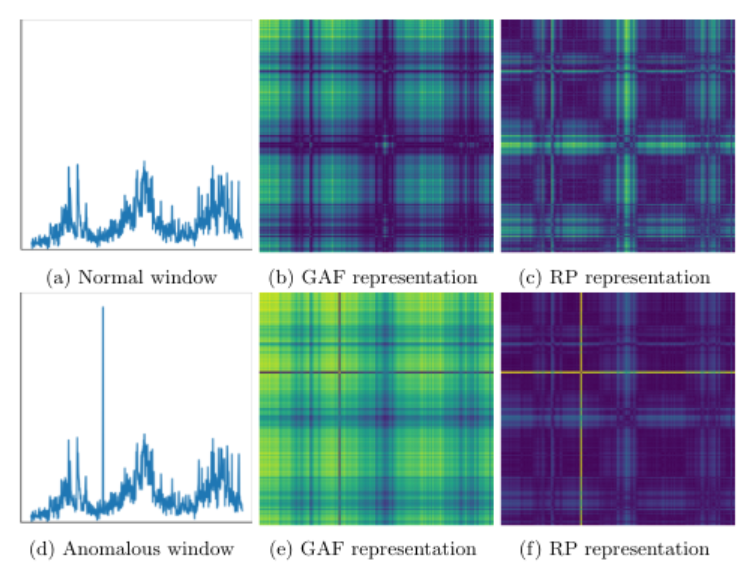

## (1) 簡易方法

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def normalize_timeseries(ts):
    min_val, max_val = np.min(ts), np.max(ts)
    scaled_ts = (ts - min_val) / (max_val - min_val)
    scaled_ts = scaled_ts * 2 - 1  # scale to [-1, 1]
    return scaled_ts

def polar_encode(ts):
    phi = np.arccos(ts)  # convert to angular values
    r = np.linspace(0, 1, len(ts))
    return r, phi

def gaf_matrix(ts):
    ts_norm = normalize_timeseries(ts)
    r, phi = polar_encode(ts_norm)
    print(phi[:, None].shape, phi[None, :].shape)
    gaf = np.cos(phi[:, None] + phi[None, :])
    return gaf

def plot_gaf(gaf, title='Gramian Angular Field'):
    plt.imshow(gaf, cmap='rainbow', origin='lower')
    plt.colorbar()
    plt.title(title)
    plt.show()

(100, 1) (1, 100)


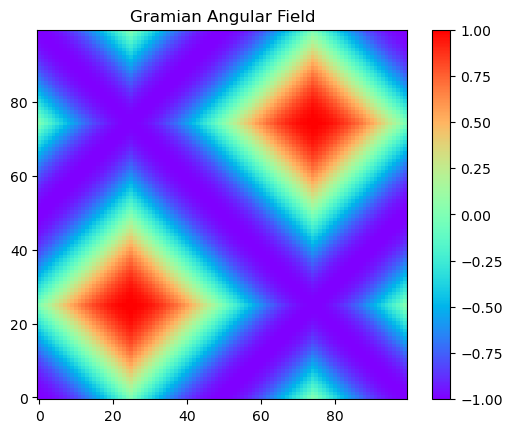

In [18]:
# Example usage
ts = np.sin(np.linspace(0, 2 * np.pi, 100))  # example time series
gaf = gaf_matrix(ts)
plot_gaf(gaf)

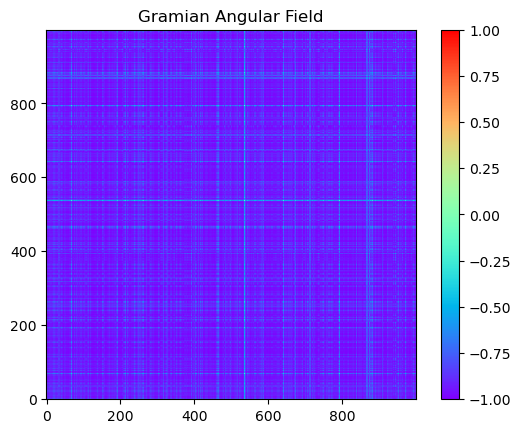

In [35]:
# Example usage
ts = np.sin(np.linspace(0, 2 * np.pi, 100))  # example time series
gaf = gaf_matrix(np.random.normal(0, 1, size = (1000)))
plot_gaf(gaf)

## (2) 論文方法

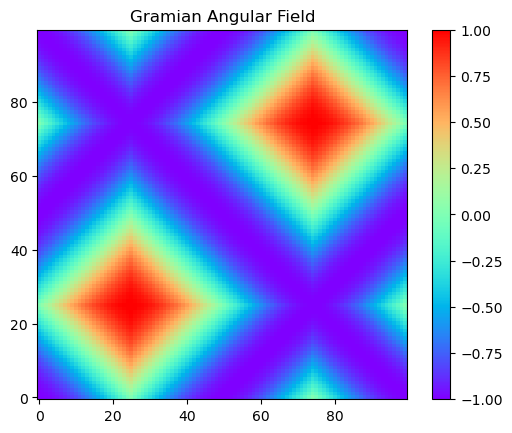

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def normalize_timeseries(ts):
    min_val, max_val = np.min(ts), np.max(ts)
    scaled_ts = (ts - min_val) / (max_val - min_val)
    scaled_ts = scaled_ts * 2 - 1  # scale to [-1, 1]
    return scaled_ts

def polar_encode(ts):
    phi = np.arccos(ts)  # convert to angular values
    r = np.linspace(0, 1, len(ts))
    return r, phi

def gaf_matrix(ts):
    ts_norm = normalize_timeseries(ts)
    r, phi = polar_encode(ts_norm)
    
    # Calculate GAF matrix according to the formula
    outer_product = np.outer(ts_norm, ts_norm)
    sin_component = np.sqrt(1 - ts_norm**2)
    gaf = outer_product - np.outer(sin_component, sin_component)
    
    return gaf

def plot_gaf(gaf, title='Gramian Angular Field'):
    plt.imshow(gaf, cmap='rainbow', origin='lower')
    plt.colorbar()
    plt.title(title)
    plt.show()

# Example usage
ts = np.sin(np.linspace(0, 2 * np.pi, 100))  # example time series
gaf = gaf_matrix(ts)
plot_gaf(gaf)

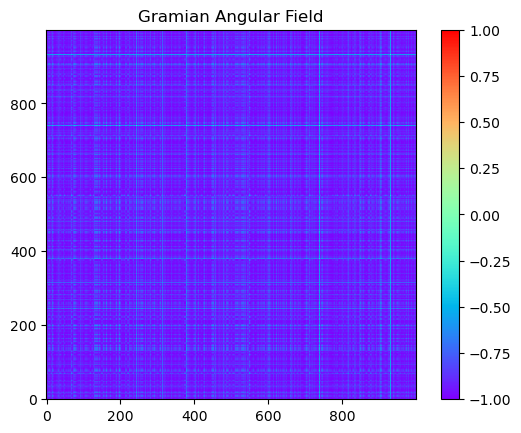

In [34]:
# Example usage
ts = np.sin(np.linspace(0, 2 * np.pi, 100))  # example time series
gaf = gaf_matrix(np.random.normal(0, 1, size = (1000)))
plot_gaf(gaf)

# 實驗二、1D-conv AutoEncoder

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim

# 定義1D卷積自編碼器
class Conv1dAutoEncoder(nn.Module):
    def __init__(self, n_features):
        super(Conv1dAutoEncoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv1d(in_channels=n_features, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Conv1d(in_channels=16, out_channels=8, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2)
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose1d(in_channels=8, out_channels=16, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose1d(in_channels=16, out_channels=n_features, kernel_size=4, stride=2, padding=1),
            nn.ReLU()
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# 初始化模型、損失函數和優化器
n_features = 7
model = Conv1dAutoEncoder(n_features)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 假設的輸入數據
input_data = torch.randn(1000, n_features, 20)  # (batch_size, n_features, seq_length)

# 訓練循環
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # 前向傳播
    outputs = model(input_data)
    loss = criterion(outputs, input_data)
    
    # 反向傳播和優化
    loss.backward()
    optimizer.step()
    
    # 打印訓練過程中的損失
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training complete!")

Epoch [1/20], Loss: 1.0007
Epoch [2/20], Loss: 1.0005
Epoch [3/20], Loss: 1.0004
Epoch [4/20], Loss: 1.0002
Epoch [5/20], Loss: 1.0001
Epoch [6/20], Loss: 0.9999
Epoch [7/20], Loss: 0.9998
Epoch [8/20], Loss: 0.9997
Epoch [9/20], Loss: 0.9996
Epoch [10/20], Loss: 0.9994
Epoch [11/20], Loss: 0.9992
Epoch [12/20], Loss: 0.9991
Epoch [13/20], Loss: 0.9989
Epoch [14/20], Loss: 0.9987
Epoch [15/20], Loss: 0.9985
Epoch [16/20], Loss: 0.9983
Epoch [17/20], Loss: 0.9980
Epoch [18/20], Loss: 0.9978
Epoch [19/20], Loss: 0.9976
Epoch [20/20], Loss: 0.9973
Training complete!


# 實驗三、Recurrent Plot

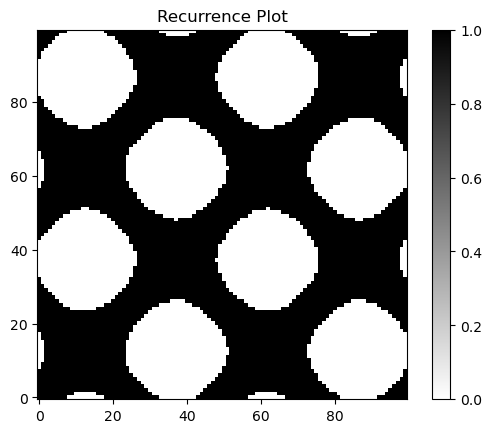

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def recurrence_plot(ts, epsilon=None, binary=False):
    """
    生成時間序列的Recurrence Plot（RP）
    
    參數:
    ts (array-like): 時間序列數據
    epsilon (float, optional): 距離閾值。如果為None，則使用所有距離的平均值。
    binary (bool): 是否生成二值化RP矩陣
    
    返回:
    RP矩陣
    """
    ts = np.array(ts)
    n = len(ts)
    
    # 計算距離矩陣
    distance_matrix = np.abs(ts[:, None] - ts[None, :])
    
    if epsilon is None:
        epsilon = np.mean(distance_matrix)
    
    if binary:
        # 生成二值化RP矩陣
        rp = (distance_matrix < epsilon).astype(float)
    else:
        # 使用原始距離
        rp = distance_matrix
    
    return rp

def plot_rp(rp, title='Recurrence Plot'):
    """
    顯示Recurrence Plot
    
    參數:
    rp (array-like): RP矩陣
    title (str): 圖像標題
    """
    plt.imshow(rp, cmap='binary', origin='lower')
    plt.colorbar()
    plt.title(title)
    plt.show()

# Example usage
ts = np.sin(np.linspace(0, 4 * np.pi, 100))  # 例子時間序列
rp = recurrence_plot(ts, binary=True)  # 生成二值化RP矩陣
plot_rp(rp)